In [ ]:
#imports
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
load_df = pd.read_csv("/content/drive/MyDrive/dataset/load_characteristics.csv")
curtailment_df = pd.read_csv("/content/drive/MyDrive/dataset/required_curtailment.csv")

In [ ]:
load_df

,IL No,Capacity,Rate,Max_off,Min_on
0,1,320,23.8,4,2
1,2,200,25.7,4,2
2,3,80,16.9,4,2
3,4,84,16.9,4,2
4,5,100,19.2,4,2
5,6,160,23.6,4,2
6,7,100,19.2,3,1
7,8,60,16.9,3,1
8,9,200,25.7,3,1
9,10,40,16.9,4,1


In [ ]:
capacities = list(load_df["Capacity"])
curtailment_rate = list(load_df["Rate"])

In [ ]:
curtailment_df

,Hour,curtailment_A,curtailment_B
0,1,0,113.8
1,2,0,227.5
2,3,0,455.0
3,4,0,682.5
4,5,444,773.5
5,6,430,796.3
6,7,436,750.8
7,8,0,637.0
8,9,336,591.5
9,10,797,609.7


In [ ]:
priority = np.array([1, 1, 2, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 1, 1, 3, 3, 1, 1])
print(priority.shape)

(19,)


In [ ]:
curtailment_A = np.array(curtailment_df["curtailment_A"])

In [ ]:
curtailment_B = np.array(curtailment_df["curtailment_B"])

In [ ]:
Max_off = np.array(load_df["Max_off"])
Min_on = np.array(load_df["Min_on"])

In [ ]:
'''
EXTRA CURTAILMENT CONSTRAINT
OPERATIONAL DURATION
'''

def obj_func(sol, N, T, capacity, curtailment_rate):

  sch = sol
  s1 = 0
  curtailment_count = np.zeros(N)
  UC = 0
  for t in range(T):

    hour_curtailment = 0
    curtailment_count = np.add(curtailment_count , np.array(sch[t]))
    for n in range(N):
      s1 += sch[t][n]*capacity[n]*curtailment_rate[n]*(4-priority[n])
      hour_curtailment += capacity[n]*sch[t][n]

    if hour_curtailment < curtailment_A[t]:
      UC += 1

  curtailment_count = curtailment_count.astype(int).tolist()

  curtailment_freq = [0 for _ in range(T+1)]

  for c in curtailment_count:
    for j in range(c+1):
      curtailment_freq[j] += 1

  s2 = 0
  for i in range(2, T+1):
    s2 += (2**(i-2))*curtailment_freq[i]


  s2 *= 1000

  UC *= 10000000


  # ADDITIONAL CONSTRAINTS IMPLEMENTATION

  over = 0
  under = 0

  for i in range(N):
    off_hours = curtailment_count[i]
    on_hours = T-off_hours

    if off_hours > Max_off[i]:
      over += off_hours - Max_off[i]

    if on_hours < Min_on[i]:
      under += Min_on[i] - on_hours

  over *= 1000
  under *= 100000
  return (s1 + s2 + UC + over + under)

In [ ]:
import random
import numpy as np

matrix_size = (16, 19)
harmony_memory_size = 10
max_iterations = 1000
harmony_memory = []

HMCR = 0.2 #Harmonic memory consideration
PAR = 0.5 #Pitch adjustment rate

# Initialize the harmony memory with random binary matrices
for _ in range(harmony_memory_size):
    solution = np.random.choice([0, 1], size=matrix_size)
    harmony_memory.append(solution)

# Main Harmony Search loop
for iteration in range(max_iterations):
    if random.random() <= HMCR:
      new_solution = random.choice(harmony_memory)
      for i in range(matrix_size[0]):
        for j in range(matrix_size[1]):
            if random.random() <= PAR:
                new_solution[i, j] = random.choice([0, 1])
    else:
      new_solution = np.random.choice([0, 1], size=matrix_size)



    new_solution_fitness = obj_func(new_solution, 19, 16, capacities, curtailment_rate)

    # Find the worst solution in the harmony memory
    worst_fitness = -float("inf")
    worst_index = None

    for i in range(len(harmony_memory)):
      fitness = obj_func(harmony_memory[i], 19, 16, capacities, curtailment_rate)
      if fitness > worst_fitness:
        worst_fitness = fitness
        worst_index = i

    # Replace the worst solution
    if new_solution_fitness < worst_fitness:
        print(new_solution_fitness)
        harmony_memory[worst_index] = new_solution

# Find the best solution

best_fitness = float("inf")
best_solution = None

for sol in harmony_memory:
  fitness = obj_func(sol, 19, 16, capacities, curtailment_rate)
  if fitness < best_fitness:
    best_fitness = fitness
    best_solution = sol



print("Best solution:")
print(best_solution)
print("Best fitness:", best_fitness)


8162892.399999999
11891665.2
5637434.4
11517486.4
9249735.6
6418569.6
5010452.0
6121506.399999999
4465998.0
5801159.199999999
4695641.6
5612910.399999999
4072080.4
5019566.8
10410679.6
7177769.199999999
4714274.0
3824788.0
4900317.6
4140109.6
5673408.8
4411932.4
4773009.6
3812784.4
5733127.2
5310152.8
5607701.199999999
3550570.4
4465694.399999999
4661701.2
3710977.1999999997
6077225.6
4817590.0
4346700.399999999
4470368.399999999
4805454.8
4596168.8
3782812.8
4778157.199999999
3538256.3999999994
4124490.8
3066458.3999999994
4592272.0
10817818.4
9224795.2
7288264.0
8421361.6
4127969.5999999996
8599245.6
6196300.0
8184305.6
6000593.6
6703266.8
4107999.5999999996
4551932.0
4004615.6
4570501.6
4356881.6
4135731.1999999997
4536543.2
4145451.6
5873404.0
5471187.6
5110538.8
5672914.8
5250098.399999999
5913206.0
6997852.0
4176298.8
4080825.1999999997
4975822.399999999
4910139.6
3105906.8
4342708.4
4711965.6
4915117.199999999
3110488.3999999994
4480815.2
4119822.8
3465417.1999999997
5993248.0
3

In [ ]:
best_solution

array([[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1],
       [0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
       [0,

In [ ]:
G_best_x = [list(row) for row in list(best_solution)]

In [ ]:
G_best_hourly = []

for t in range(16):
  curtailed = 0
  for n in range(19):
    curtailed += G_best_x[t][n]*capacities[n]

  G_best_hourly.append(curtailed)

np.array(G_best_hourly)

array([1116,  740, 1380, 1064, 1060, 1160, 1264,  972, 1212, 1080,  784,
        840,  604, 1676, 1296,  796])

In [ ]:
import matplotlib.pyplot as plt

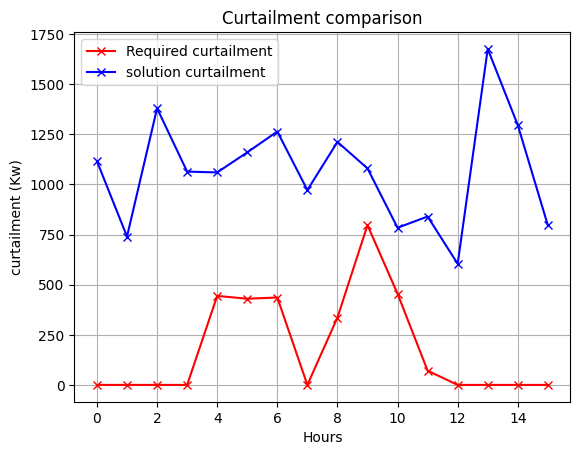

In [ ]:
plt.figure()
plt.plot(curtailment_A, marker='x', linestyle='-', color="r", label="Required curtailment")
plt.plot(G_best_hourly, marker='x', linestyle='-', color="b", label="solution curtailment")
plt.title("Curtailment comparison")
plt.xlabel("Hours")
plt.ylabel("curtailment (Kw)")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print("----------------------IL priorities and number of times interrupted----------------------")
priority_curtailment_dict = {1:0, 2:0, 3:0}
for i in range(16):
  print(f"\nIL number {i}: priority {priority[i]}: curtailed {np.sum(G_best_x[i])}\n")
  priority_curtailment_dict[priority[i]] += np.sum(G_best_x[i])

----------------------IL priorities and number of times interrupted----------------------

IL number 0: priority 1: curtailed 9


IL number 1: priority 1: curtailed 6


IL number 2: priority 2: curtailed 12


IL number 3: priority 2: curtailed 9


IL number 4: priority 3: curtailed 8


IL number 5: priority 1: curtailed 9


IL number 6: priority 2: curtailed 8


IL number 7: priority 3: curtailed 10


IL number 8: priority 2: curtailed 10


IL number 9: priority 3: curtailed 7


IL number 10: priority 2: curtailed 6


IL number 11: priority 2: curtailed 9


IL number 12: priority 3: curtailed 6


IL number 13: priority 1: curtailed 13


IL number 14: priority 1: curtailed 11


IL number 15: priority 3: curtailed 7



In [ ]:
priority_curtailment_dict

{1: 48, 2: 54, 3: 38}

In [ ]:
off_time = []
for j in range(19):
  IL_off = 0
  for i in range(16):
    IL_off += G_best_x[i][j]

  off_time.append(IL_off)

off_time

[6, 9, 6, 8, 6, 10, 8, 7, 9, 7, 9, 6, 8, 4, 9, 8, 7, 6, 7]

In [ ]:
on_time = [16-t for t in off_time]
on_time

[10, 7, 10, 8, 10, 6, 8, 9, 7, 9, 7, 10, 8, 12, 7, 8, 9, 10, 9]

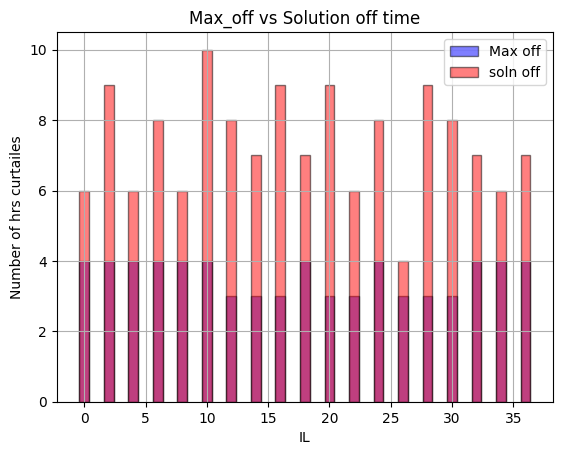

In [ ]:
bin_edges = [2*i for i in range(19)]

plt.bar(bin_edges, Max_off.tolist(), color='blue', alpha = 0.5, edgecolor='black', label='Max off')
plt.bar(bin_edges, off_time, color='red', alpha = 0.5 ,edgecolor='black', label='soln off')

plt.title('Max_off vs Solution off time')
plt.xlabel('IL')
plt.ylabel('Number of hrs curtailes')
plt.legend()
plt.grid(True)

plt.show()

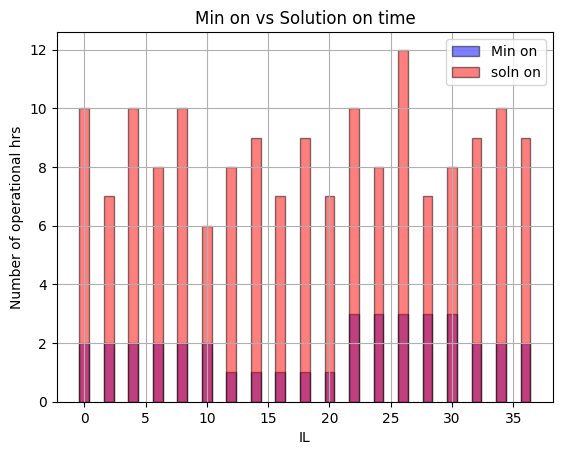

In [ ]:
bin_edges = [2*i for i in range(19)]

plt.bar(bin_edges, Min_on.tolist(), color='blue', alpha = 0.5, edgecolor='black', label='Min on')
plt.bar(bin_edges, on_time, color='red', alpha = 0.5 ,edgecolor='black', label='soln on')

plt.title('Min on vs Solution on time')
plt.xlabel('IL')
plt.ylabel('Number of operational hrs')
plt.legend()
plt.grid(True)

plt.show()